# Census Income Project

### 1. Dataset loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### 2.Checking basic details

In [3]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 32560 Columns: 15


In [4]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
print(df.isnull().sum())

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


In [8]:
for i in df.columns:
  print(df[i].value_counts())
  print("________________________________________")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
________________________________________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
________________________________________
203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64
________________________________________
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              4

There is no missing values present when we checked earlier but null values are present in the form of "?"

In [9]:
df= df.replace(' ?', np.nan)

In [10]:
print(df.isnull().sum())

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64


Replacing missing values with mode

In [11]:
df['Workclass'].fillna(df['Workclass'].mode()[0], inplace=True)
df['Occupation'].fillna(df['Occupation'].mode()[0], inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0], inplace=True)

In [12]:
print(df.isnull().sum())

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


## 3. Exploratory Data Analysis
 Univariate Analysis

<AxesSubplot:xlabel='Income', ylabel='count'>

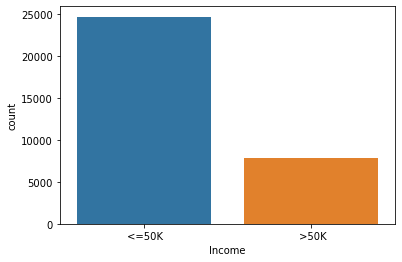

In [13]:
sns.countplot(x='Income',data=df)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

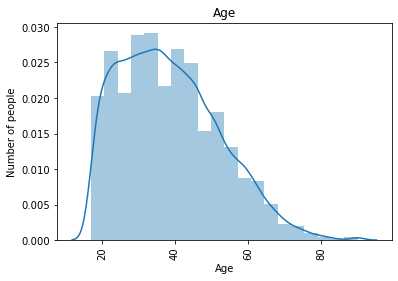

In [14]:
sns.distplot(df['Age'], bins=20)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

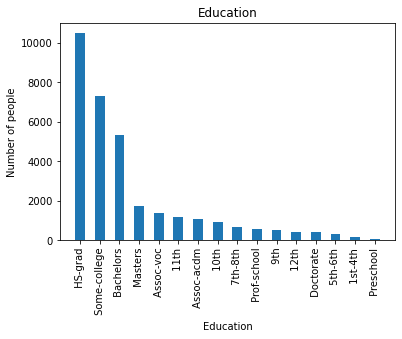

In [15]:
plt.bar(df['Education'].value_counts().index,df['Education'].value_counts(), width=0.5, align='center',data=df)
plt.title('Education')
plt.xlabel('Education')
plt.ylabel('Number of people')

plt.xticks(rotation=90)

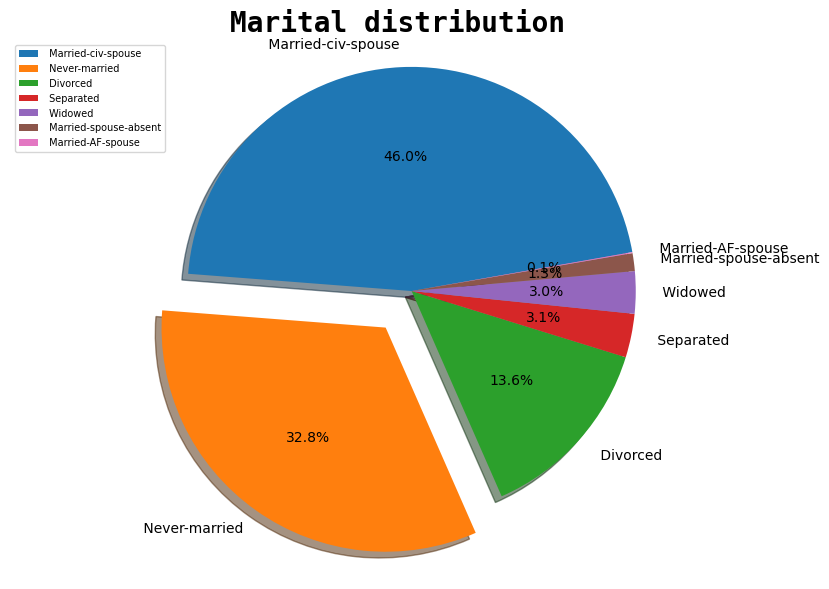

In [16]:
# Creating a pie chart for 'Marital status'
marital = df['Marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

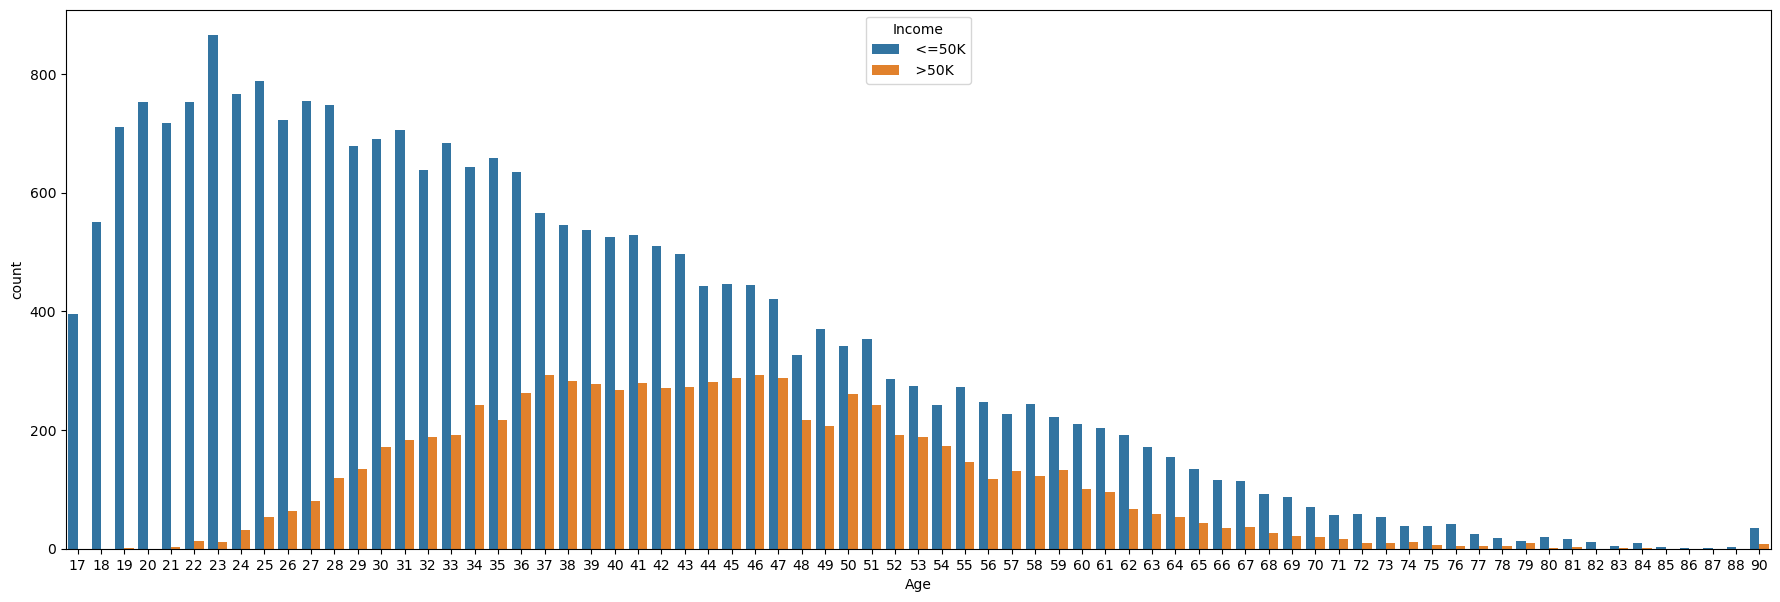

In [17]:
plt.figure(figsize=(22,7))
sns.countplot(x='Age',hue='Income',data=df)

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

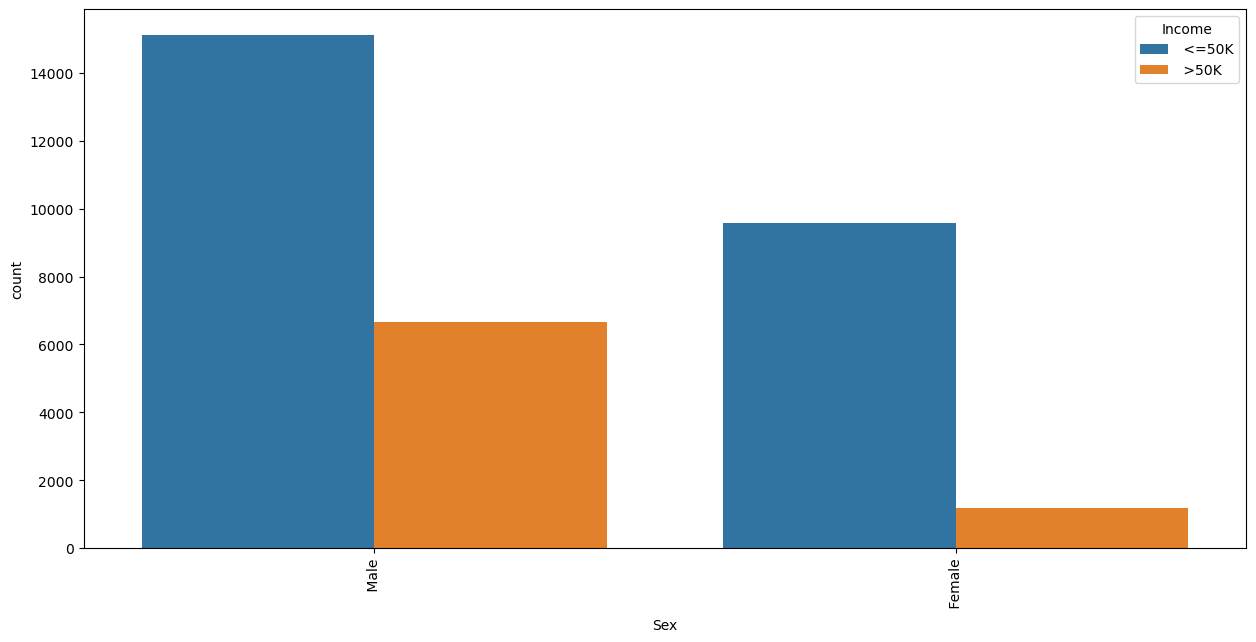

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(x='Sex',hue='Income',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

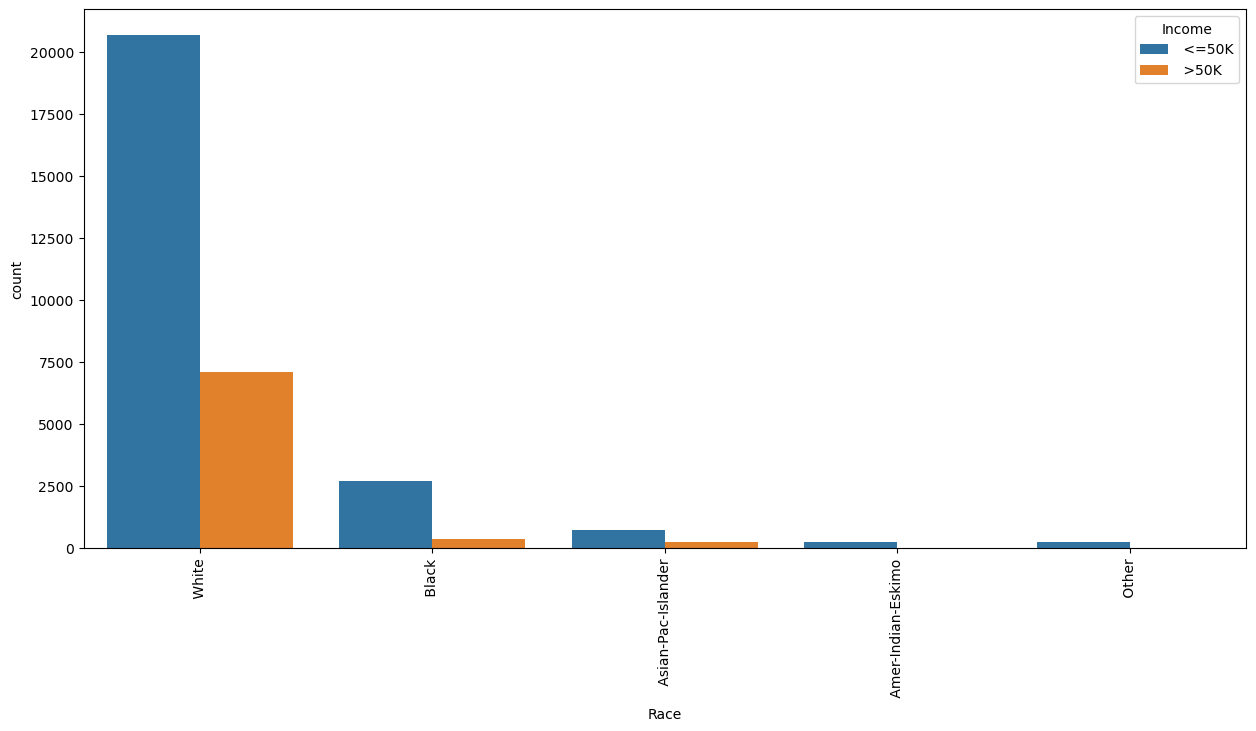

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(x='Race',hue='Income',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

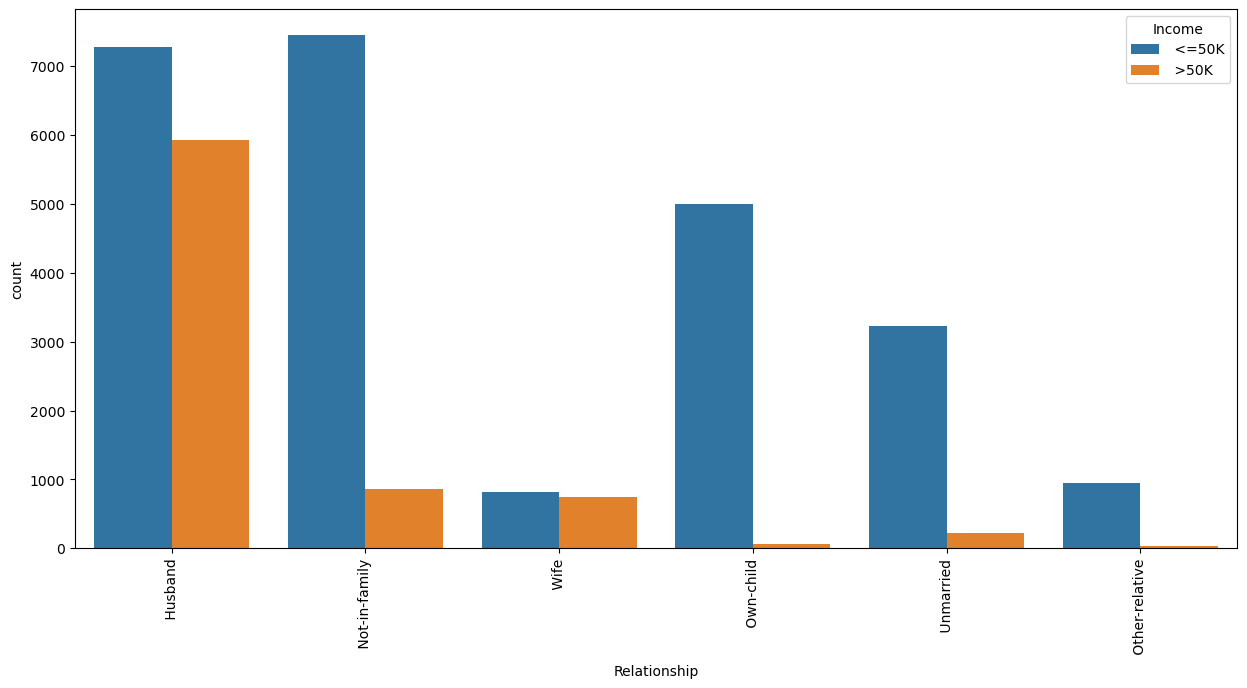

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(x='Relationship',hue='Income',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

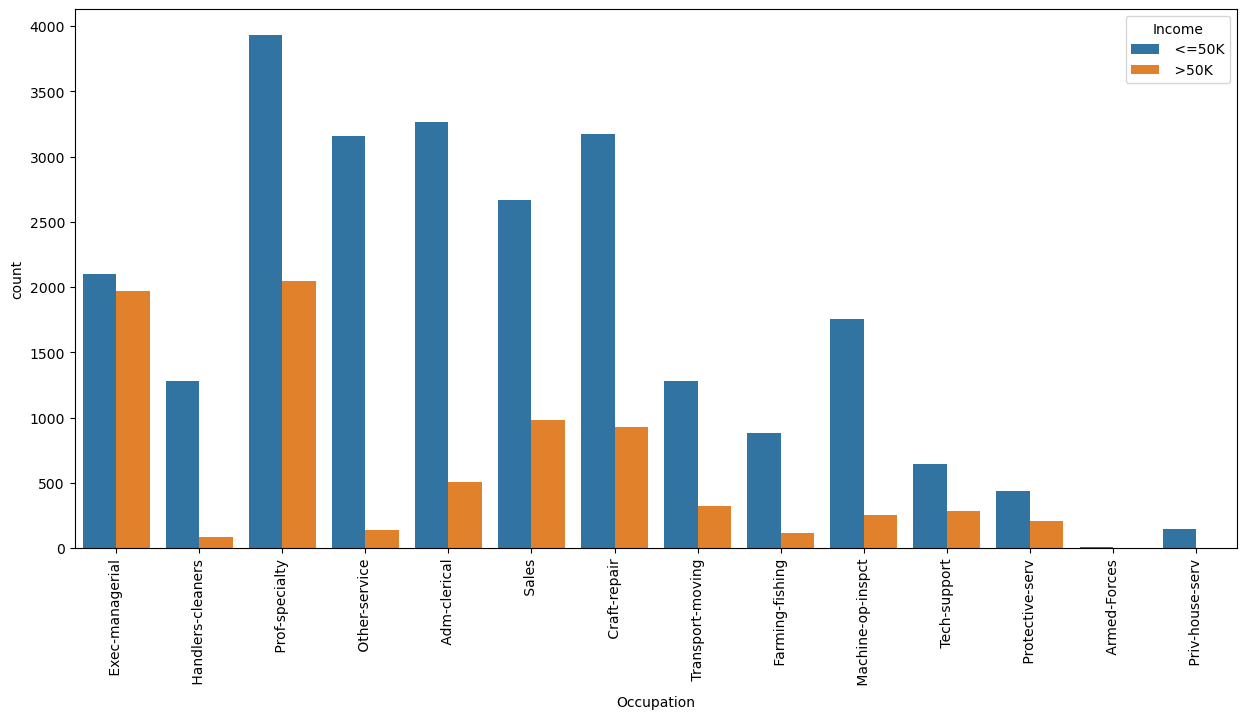

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(x='Occupation',hue='Income',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

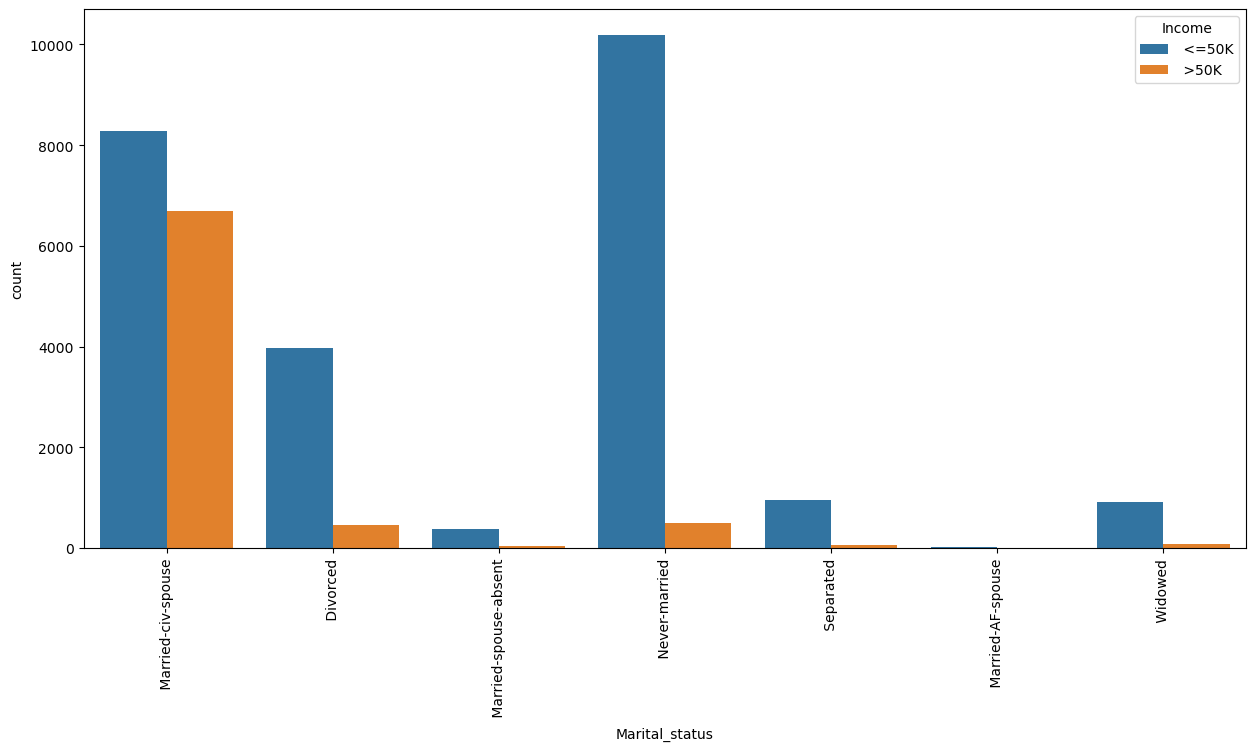

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(x='Marital_status',hue='Income',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

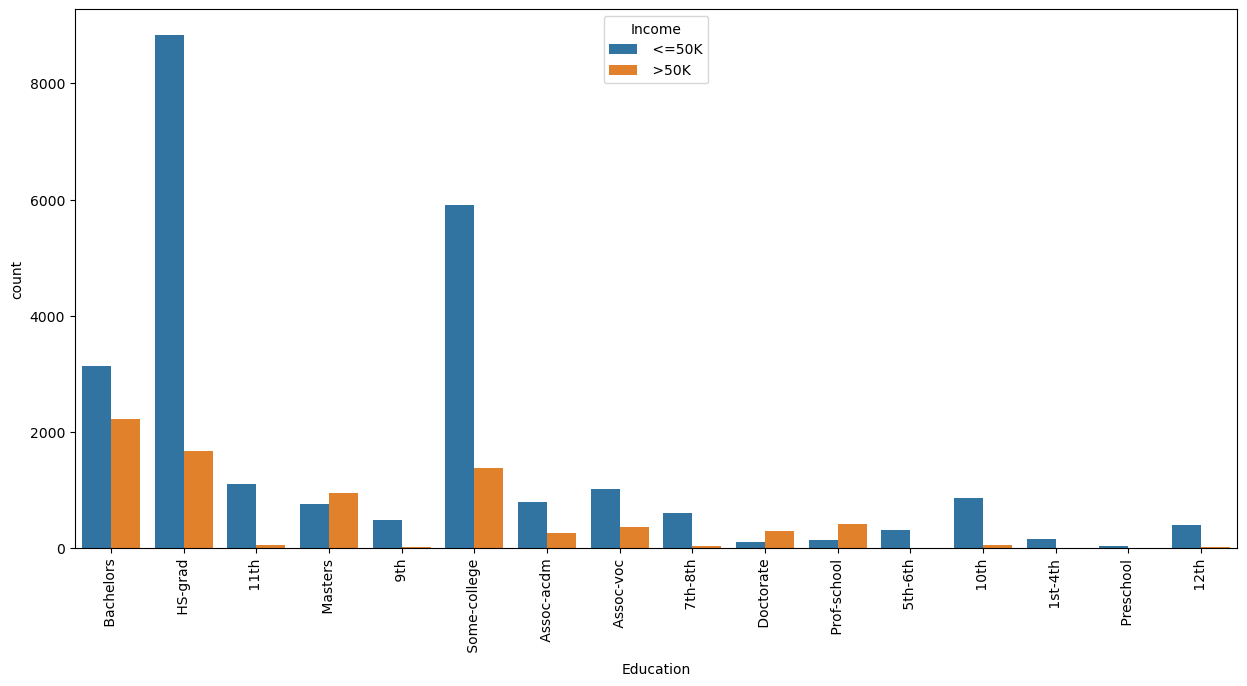

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(x='Education',hue='Income',data=df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

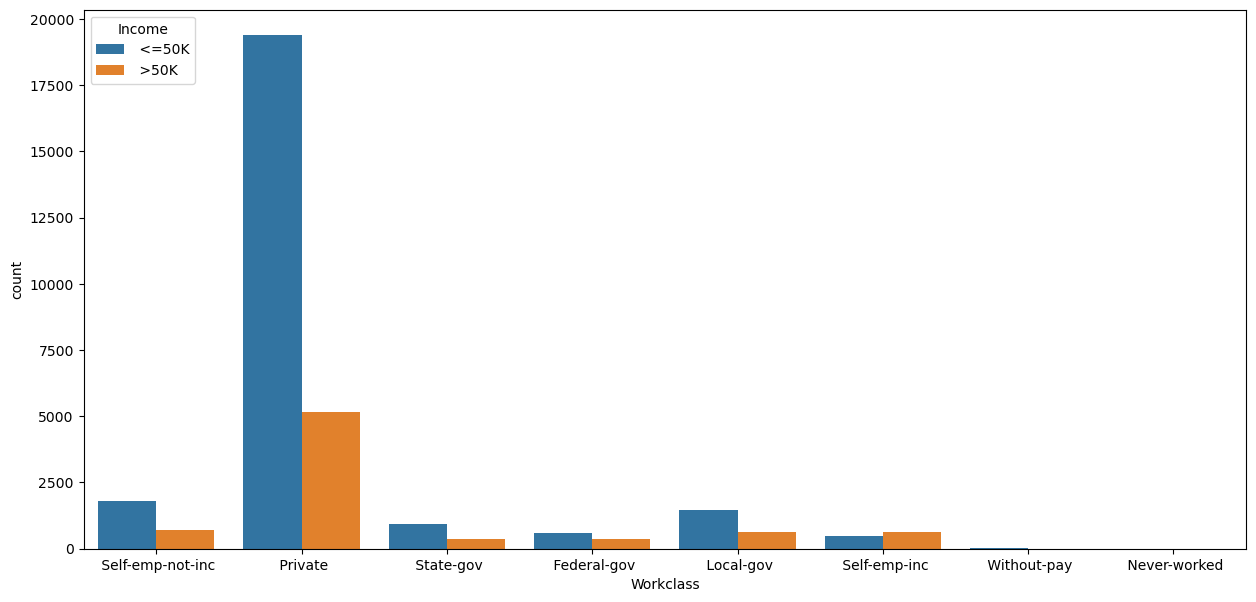

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(x='Workclass',hue='Income',data=df)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

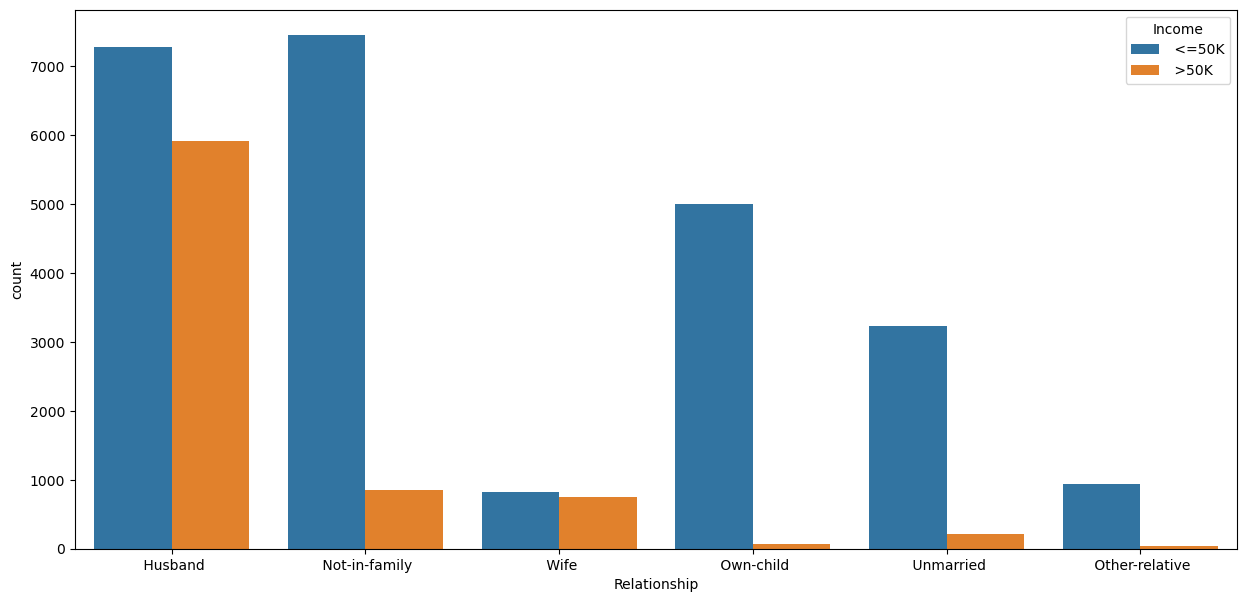

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(x='Relationship',hue='Income',data=df)

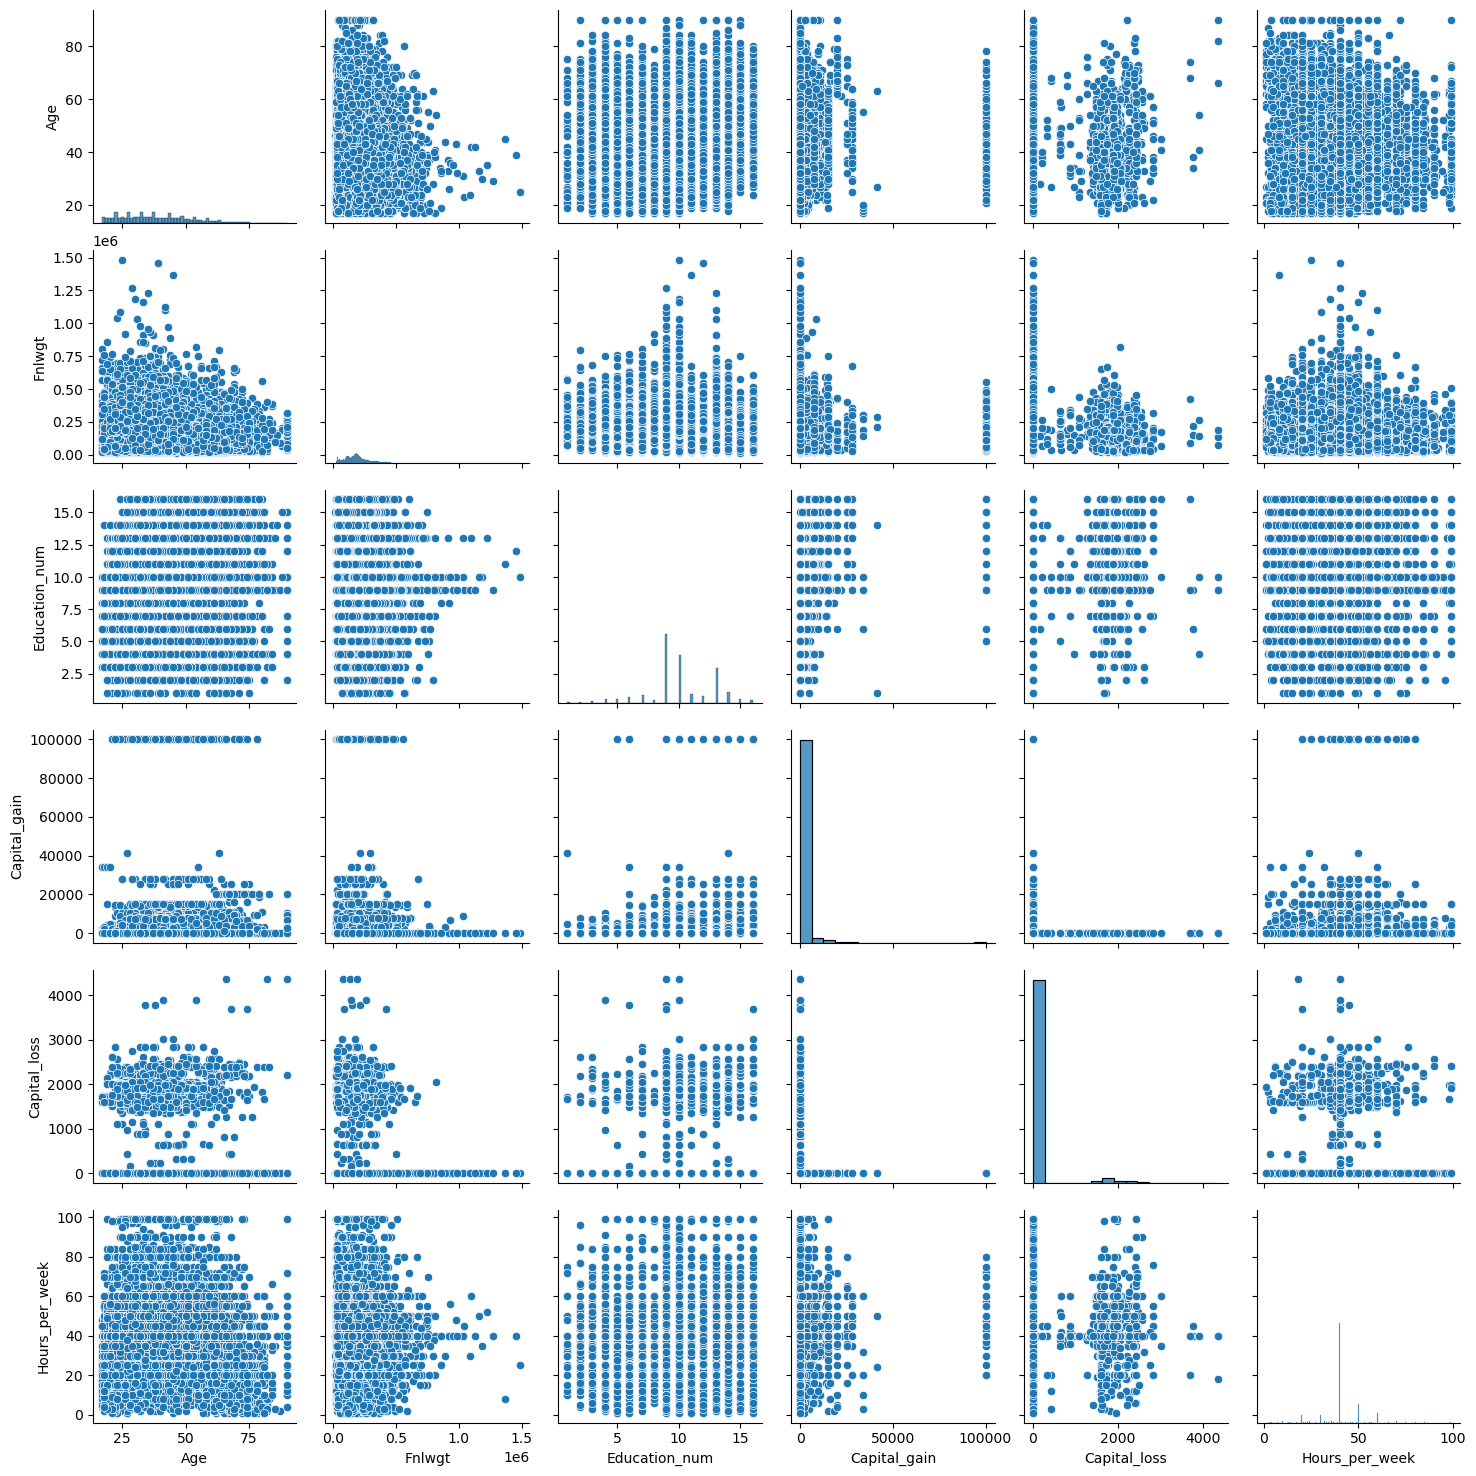

In [26]:
# Creating a pairplot of dataset
sns.pairplot(df)

## 4.Data pre-processing

### Encoding

In [27]:
categ_columns=['Workclass','Education','Marital_status','Occupation','Ralationship','Race','Sex','Native_country','Income']
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [29]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,-0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.076062,0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021285,-0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,0.215995


<AxesSubplot:>

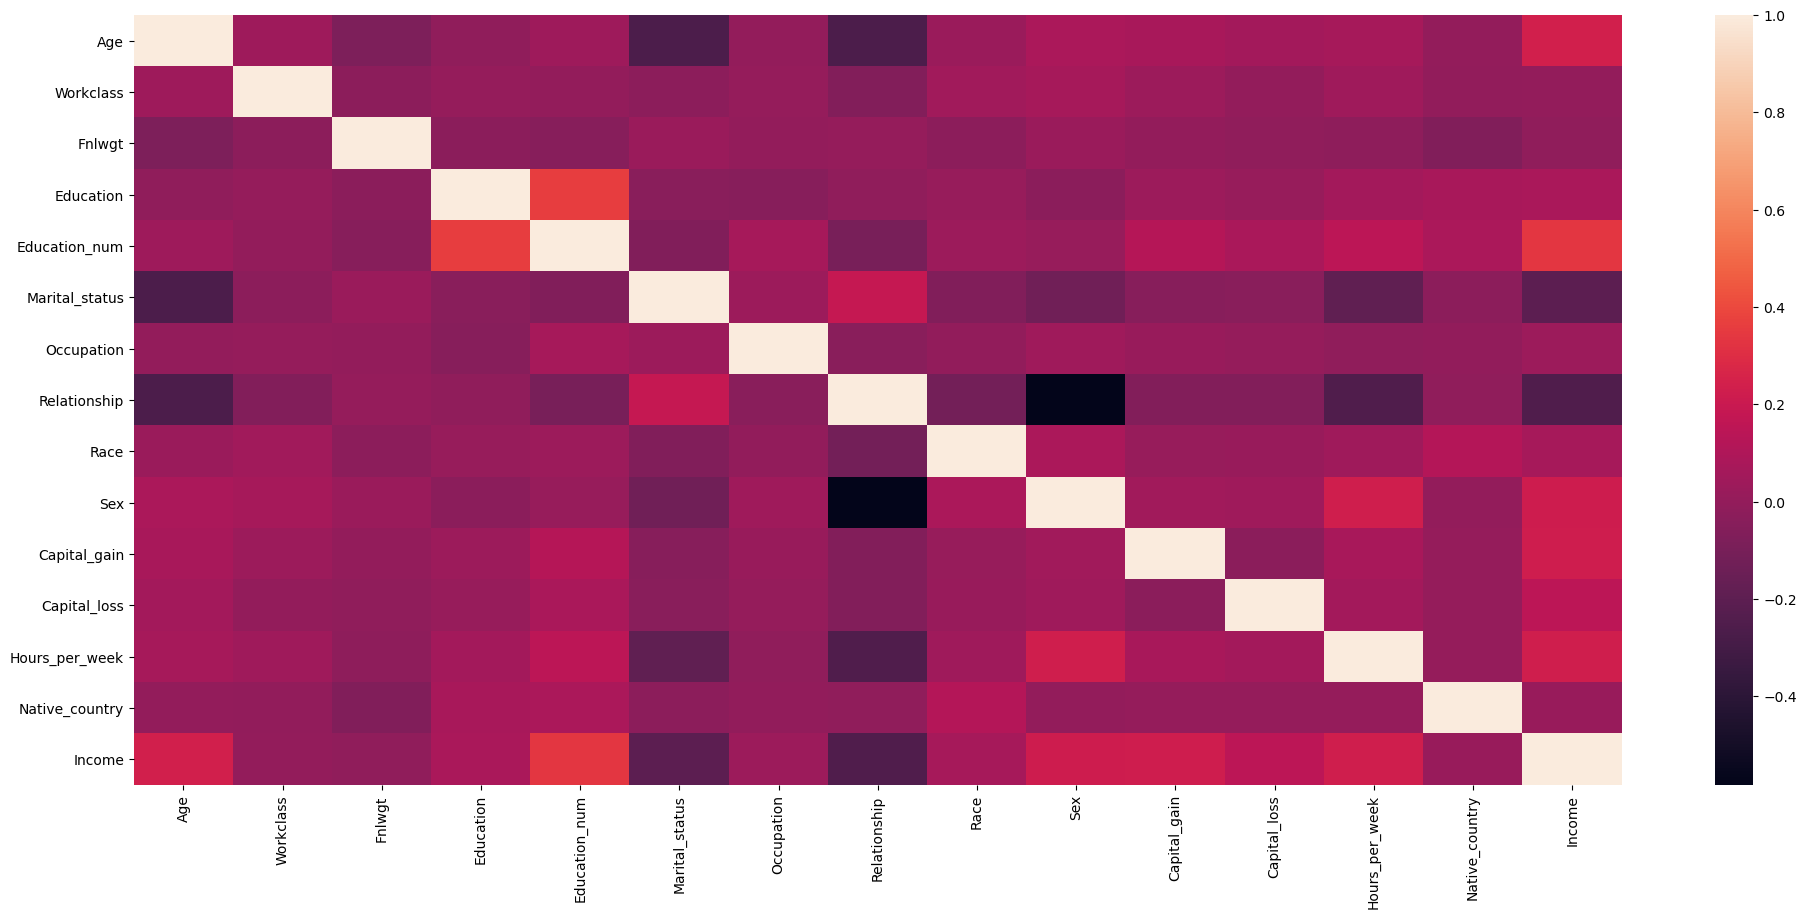

In [30]:
df_corr=df.corr()
plt.figure(figsize=[24,10])
sns.heatmap(df_corr)

Inference:
In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.

From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.

### Skewness removal

In [31]:
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

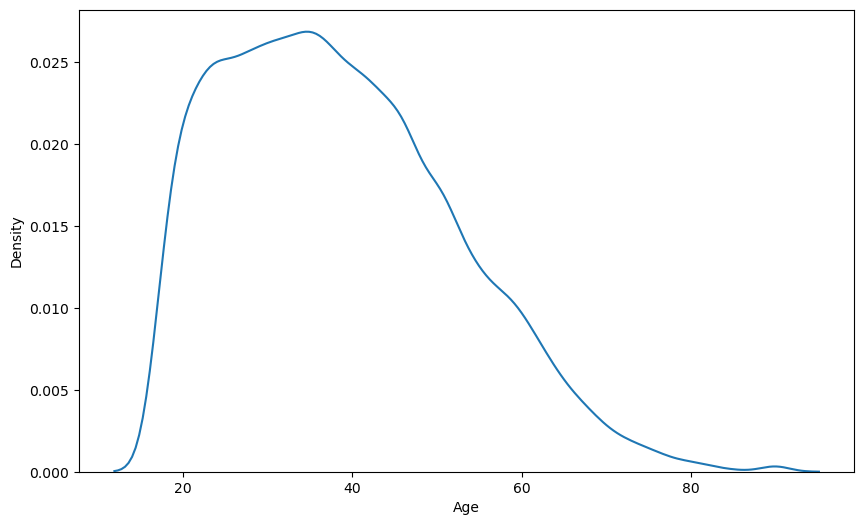

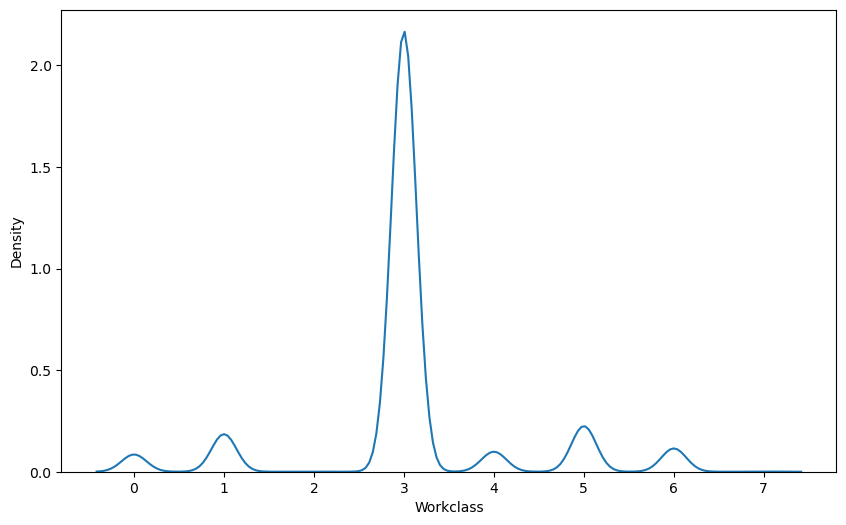

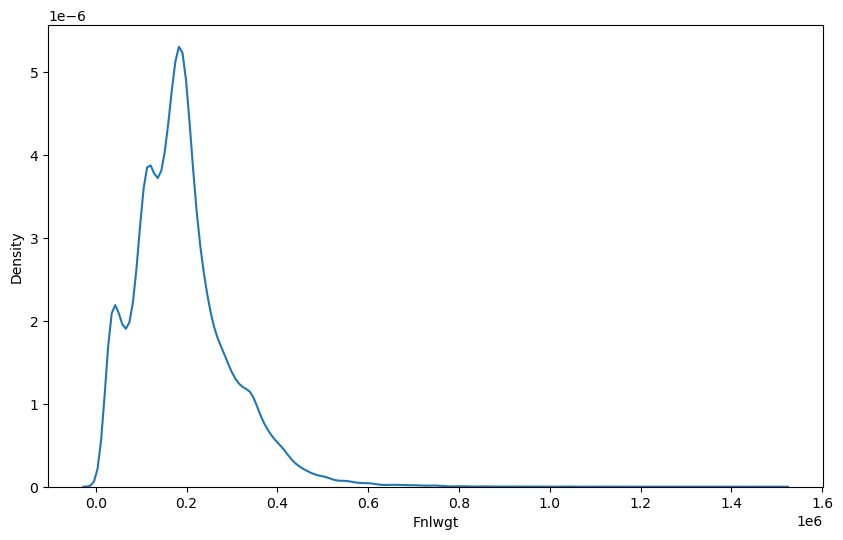

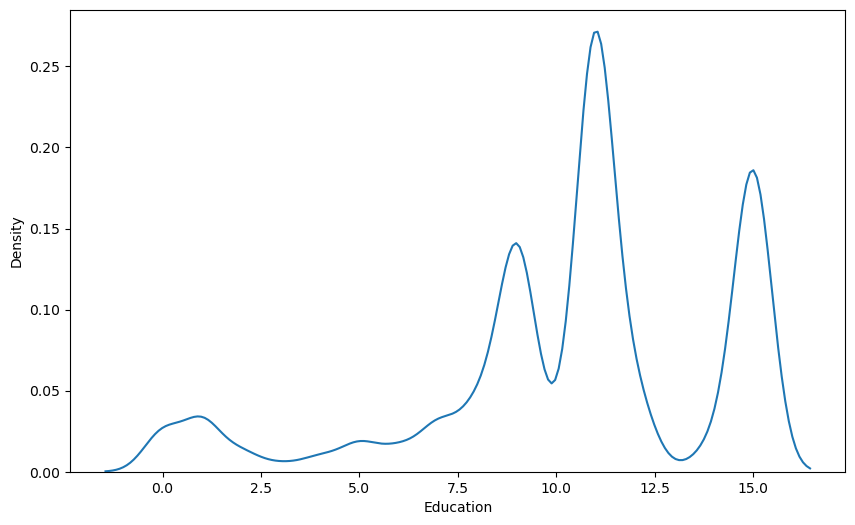

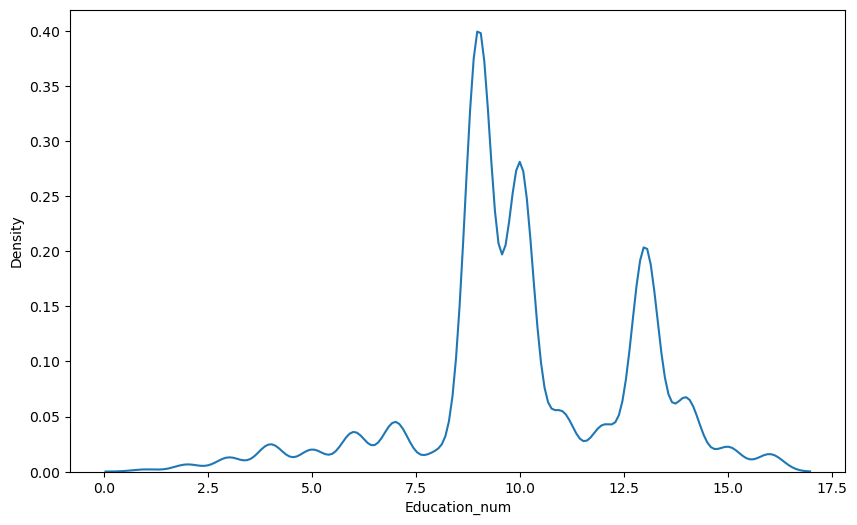

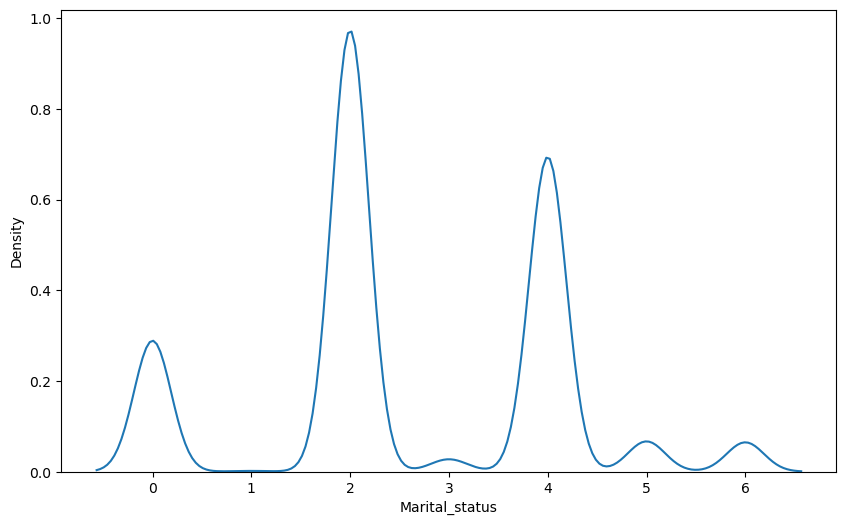

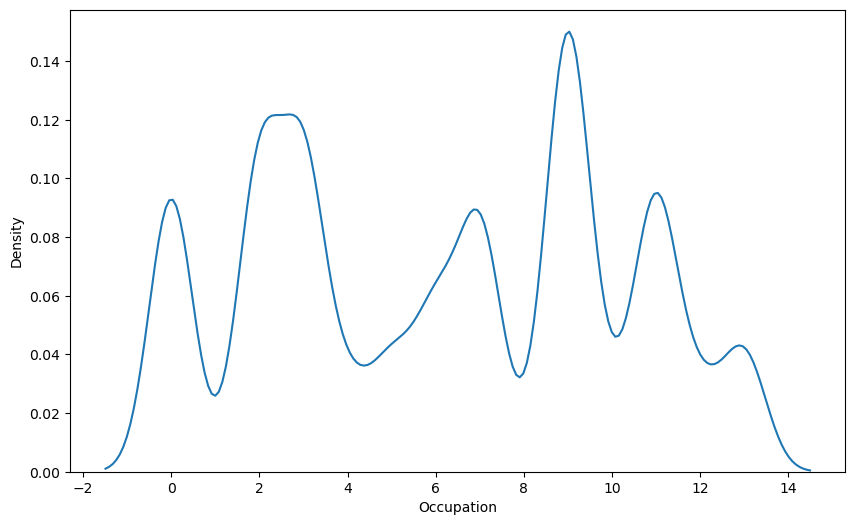

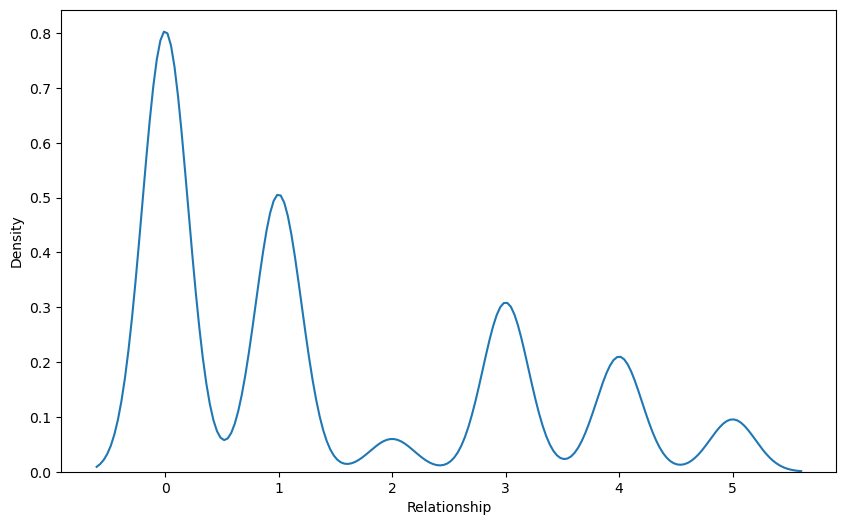

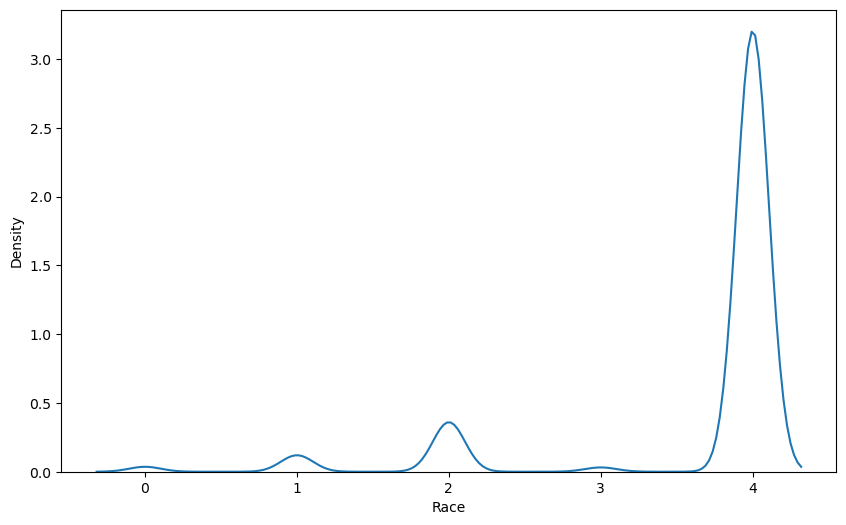

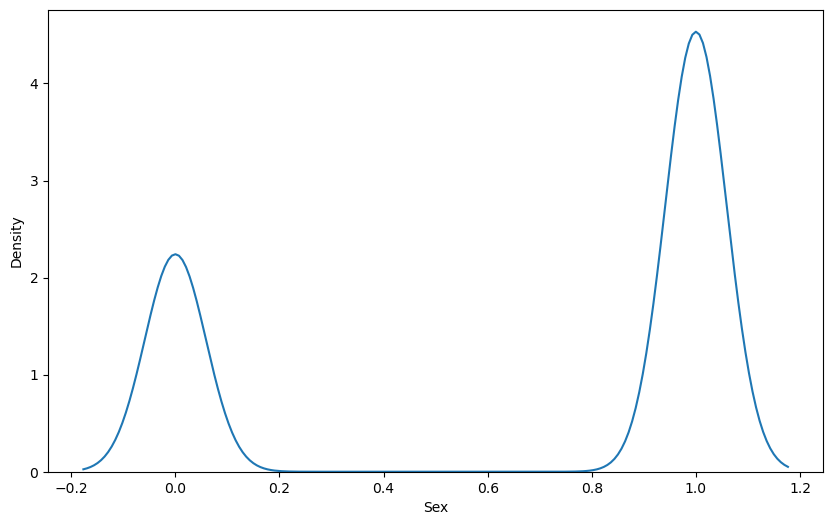

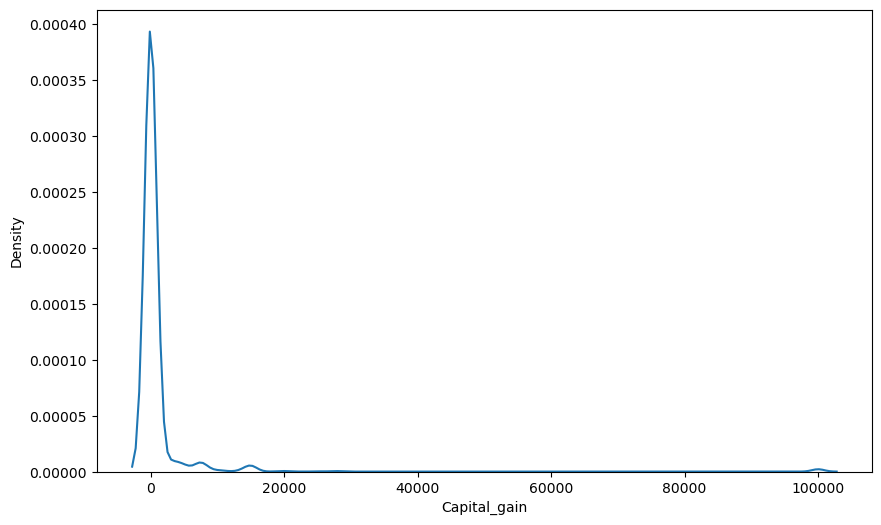

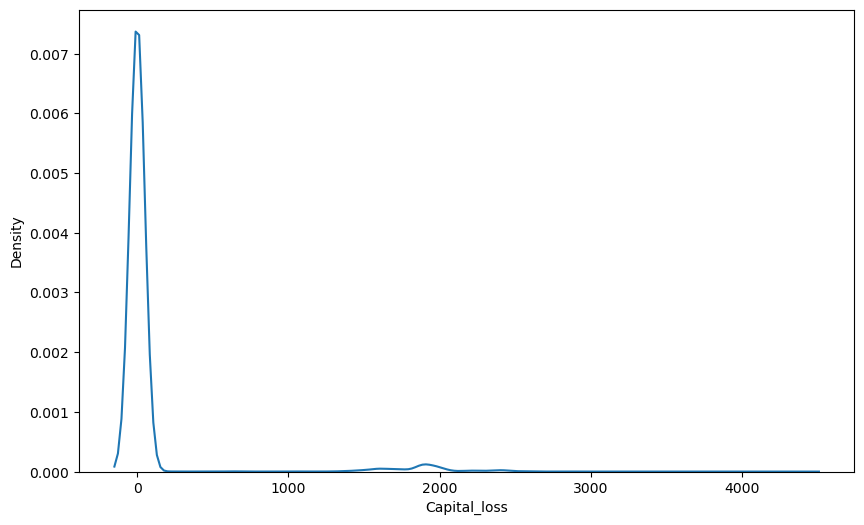

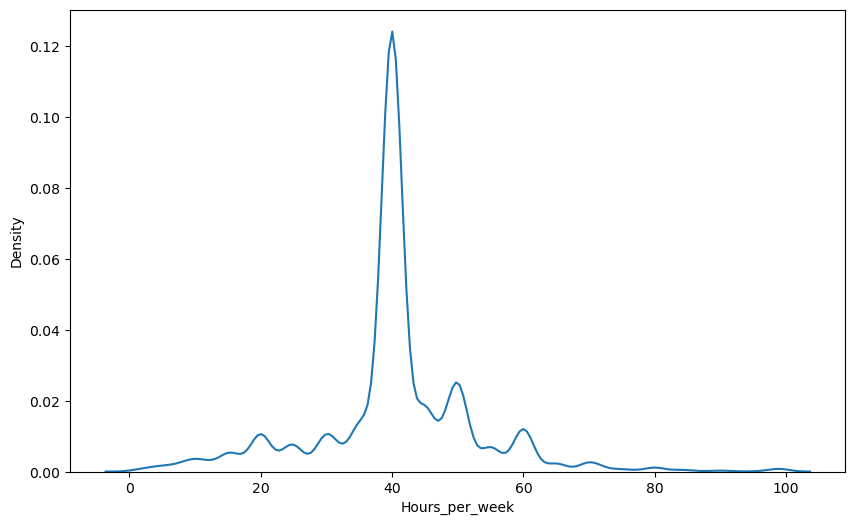

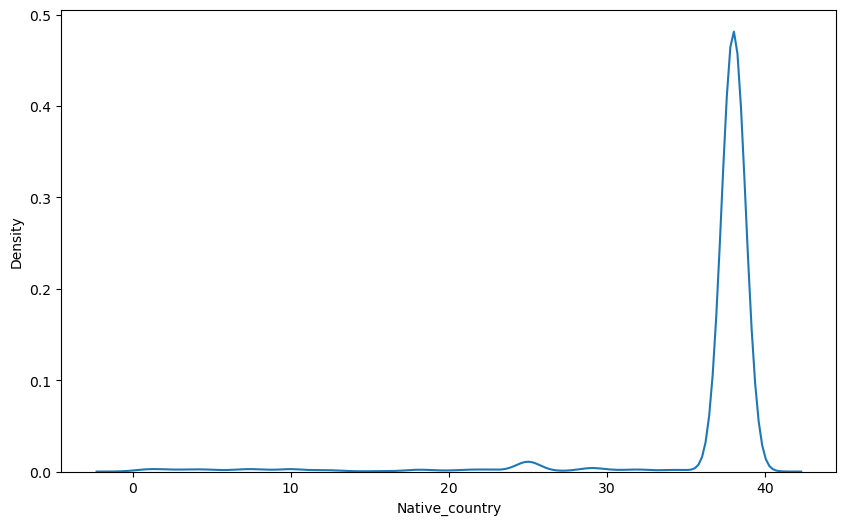

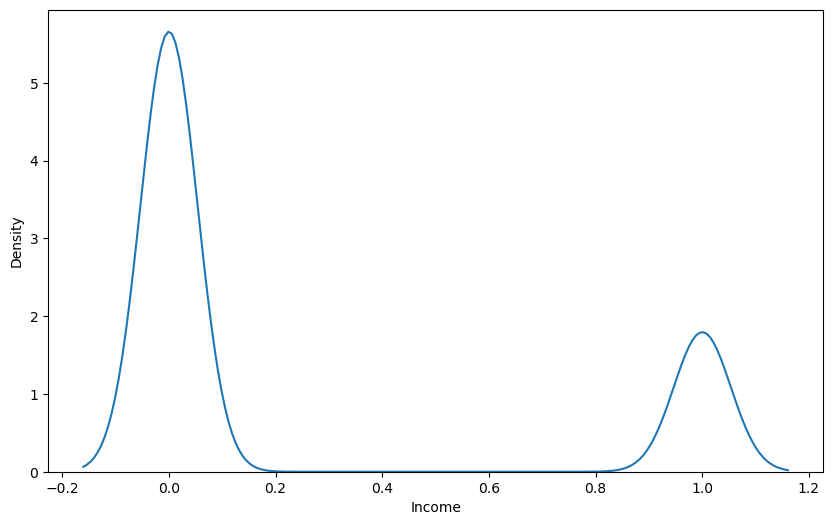

In [32]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.kdeplot(x=i,data=df)

### Outliers checking

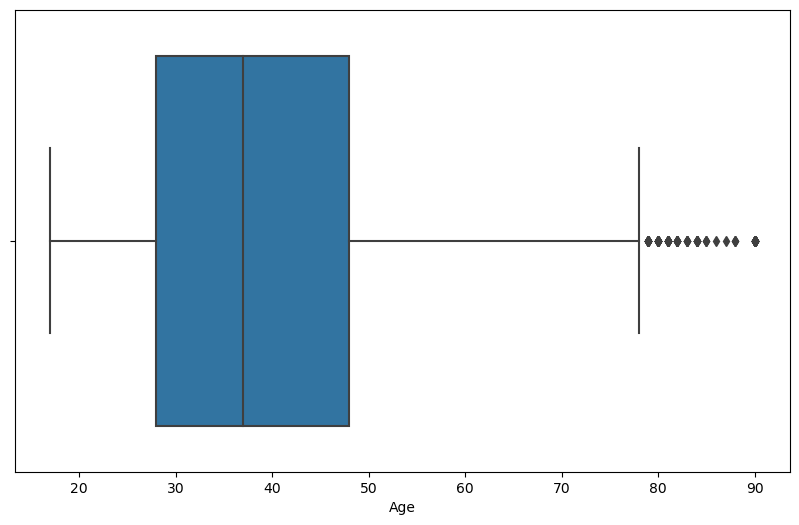

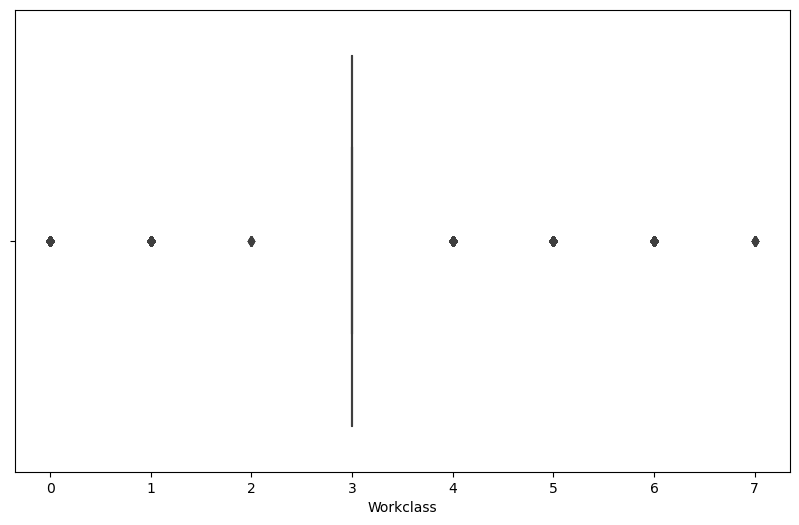

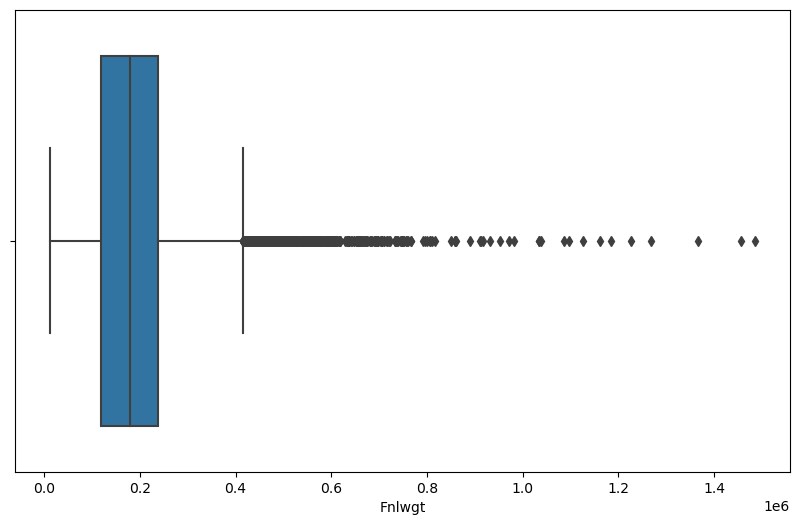

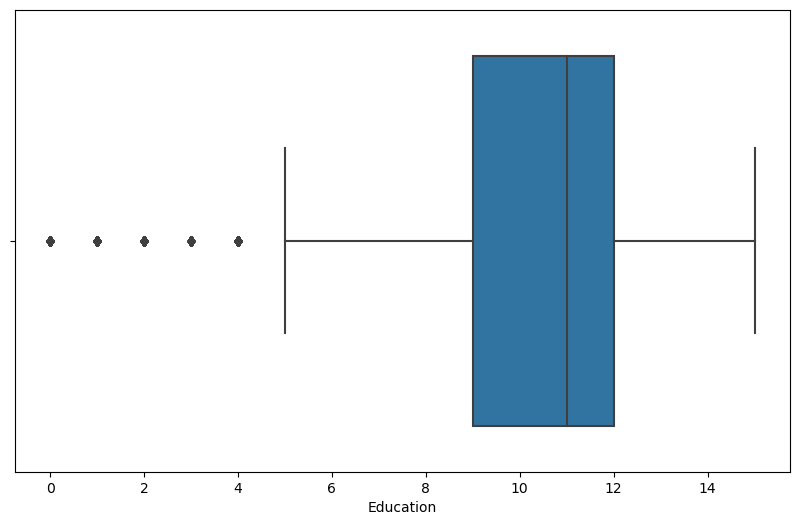

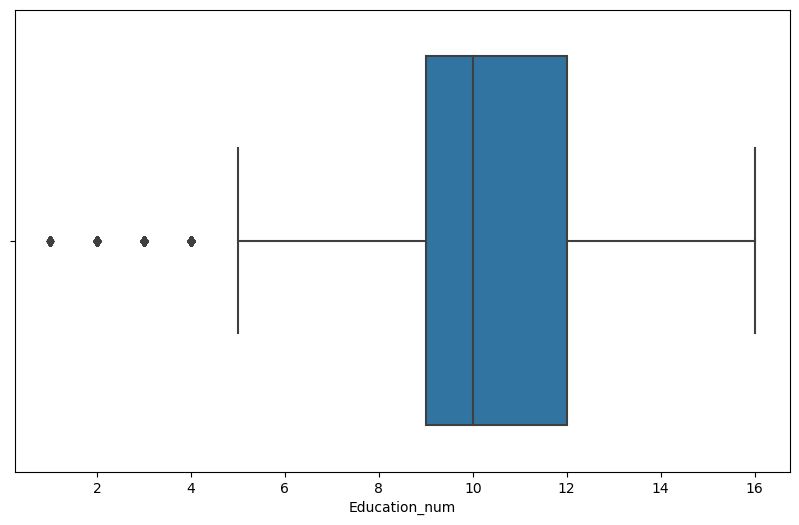

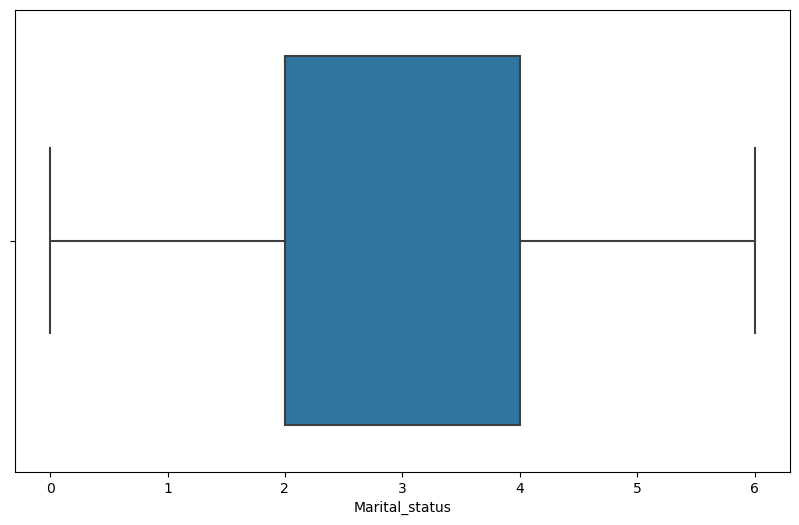

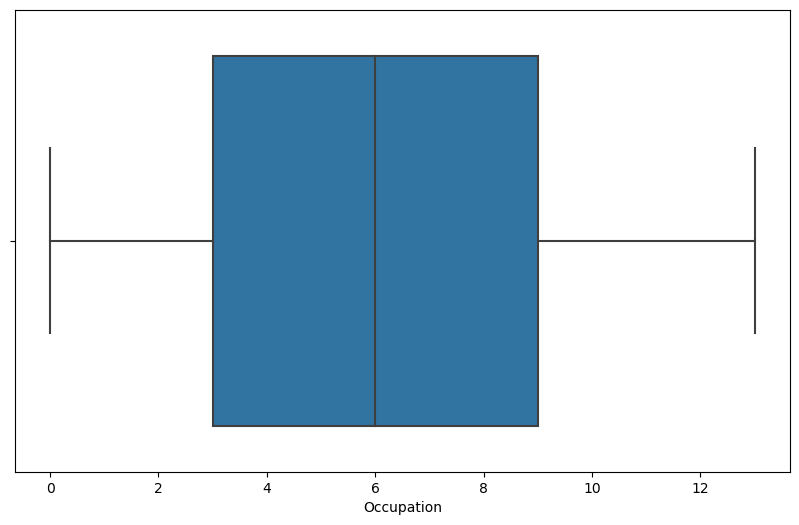

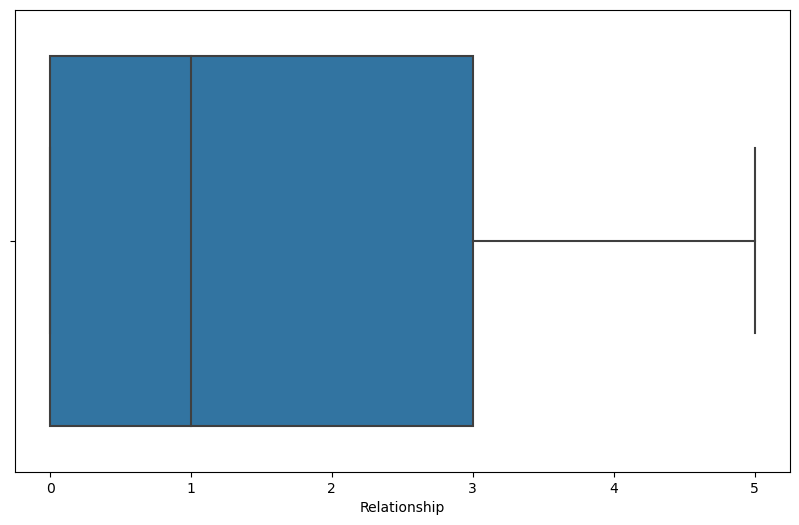

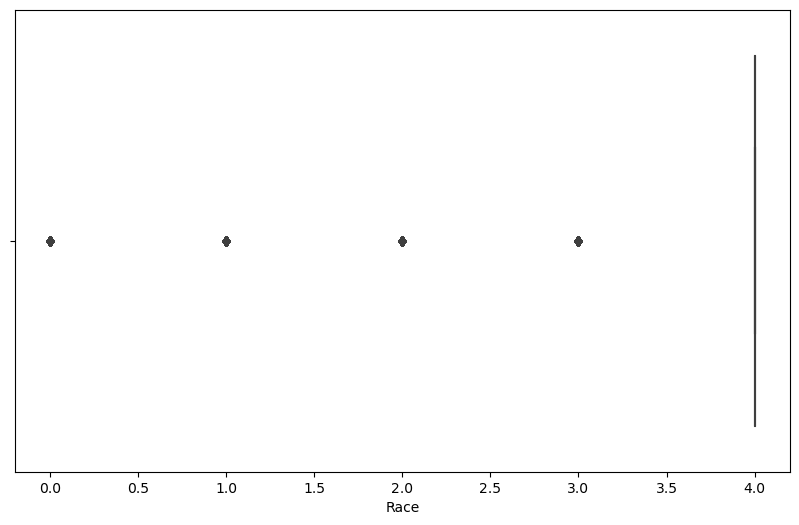

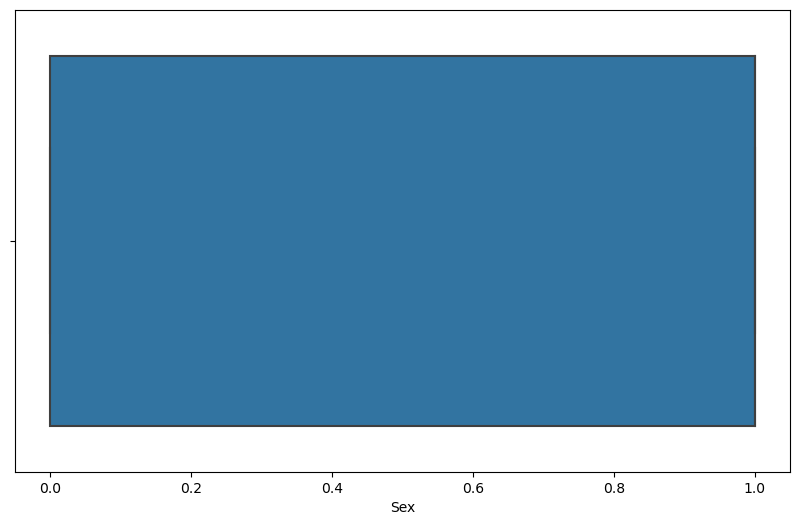

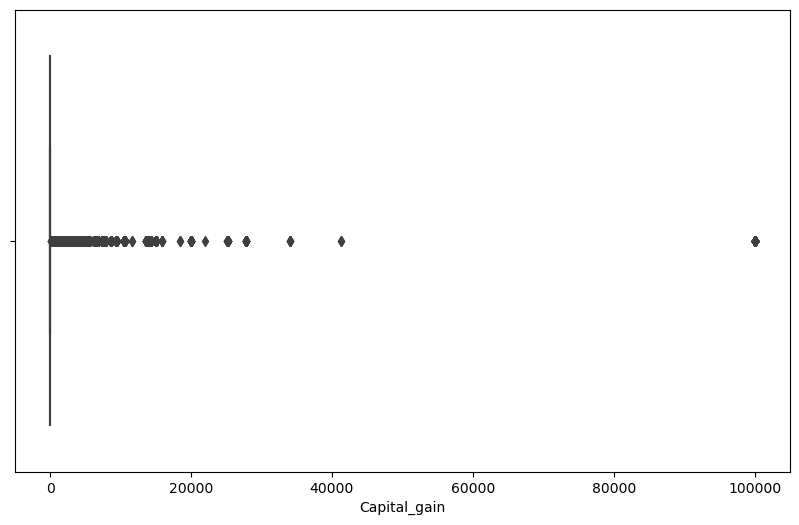

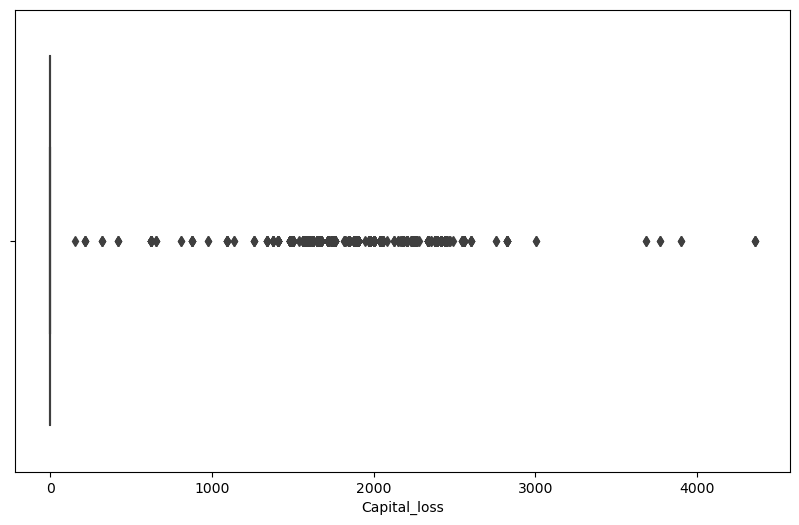

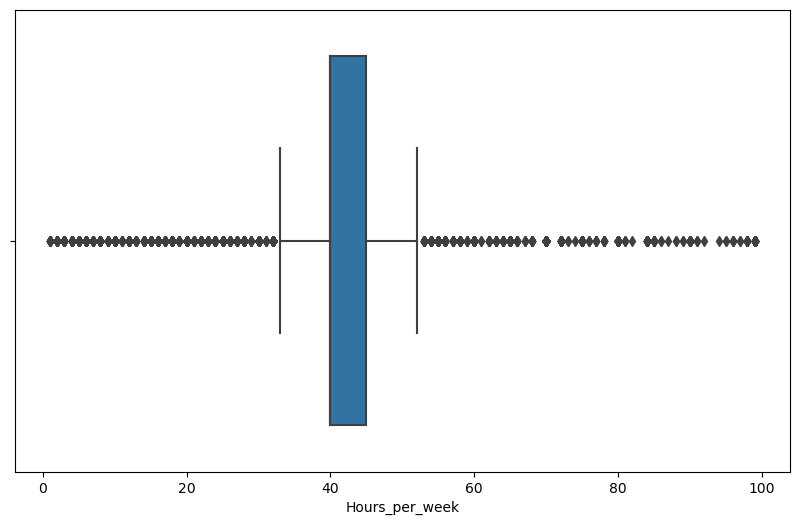

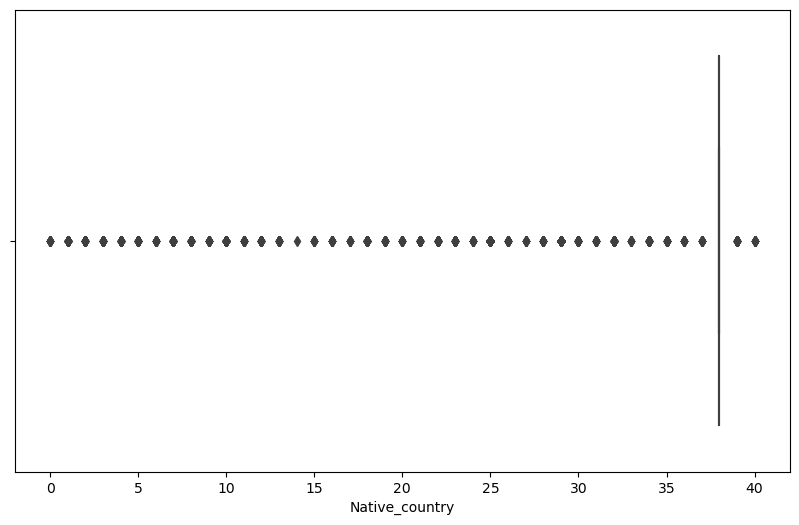

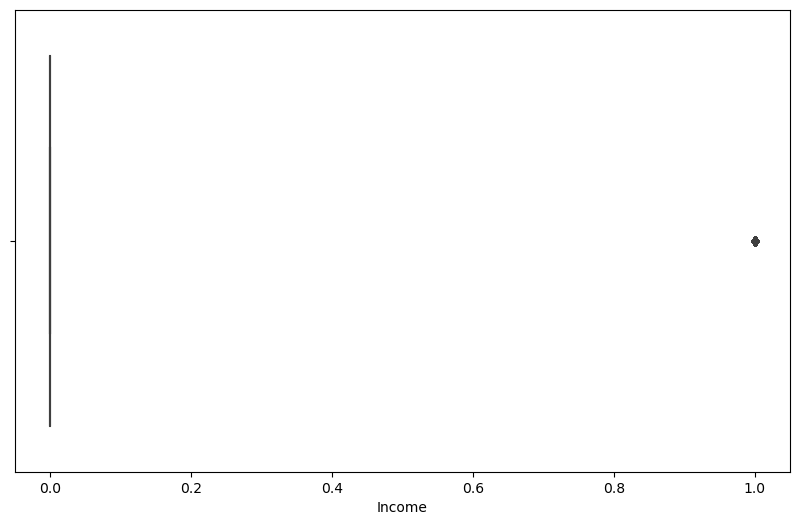

In [33]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.boxplot(x=i,data=df)

#### Removing outliers
Z Score_Technique

In [34]:
from scipy import stats
import numpy as np
print("Old Shape: ", df.shape)   
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (32560, 15)
[[0.83709708 1.72133587 1.0087417  ... 2.22212013 0.26137428 0.5632099 ]
 [0.04264043 0.08522344 0.24504633 ... 0.03542999 0.26137428 0.5632099 ]
 [1.05703146 0.08522344 0.42576955 ... 0.03542999 0.26137428 0.5632099 ]
 ...
 [1.42358875 0.08522344 0.3588108  ... 0.03542999 0.26137428 0.5632099 ]
 [1.21562378 0.08522344 0.11092744 ... 1.65520046 0.26137428 0.5632099 ]
 [0.98372    0.81805622 0.92986178 ... 0.03542999 0.26137428 1.77553698]]


In [35]:
threshold = 3
print(np.where(z > 3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [36]:
after_zscore = df[(z < 3).all(axis=1)]
after_zscore.shape

(27770, 15)

In [37]:
df.shape

(32560, 15)

### percentage data loss

In [38]:
loss_percent=(32560-27770)/32560*100
print(loss_percent)

14.71130221130221


#### Removing outlier using z score is not suggested bcz of 14% data loss

In [39]:
df1=df[['Age','Fnlwgt','Capital_gain','Capital_loss']]
df1 = np.sqrt(df)

df1.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7.071068,2.236068,288.636450,3.000000,3.605551,1.414214,1.732051,0.000000,2.000000,1.0,0.0,0.0,3.605551,6.164414,0.0
1,6.164414,1.732051,464.377002,3.316625,3.000000,0.000000,2.236068,1.000000,2.000000,1.0,0.0,0.0,6.324555,6.164414,0.0
2,7.280110,1.732051,484.480134,1.000000,2.645751,1.414214,2.236068,0.000000,1.414214,1.0,0.0,0.0,6.324555,6.164414,0.0
3,5.291503,1.732051,581.729318,3.000000,3.605551,1.414214,3.000000,2.236068,1.414214,0.0,0.0,0.0,6.324555,2.000000,0.0
4,6.082763,1.732051,533.462276,3.464102,3.741657,1.414214,1.732051,2.236068,2.000000,0.0,0.0,0.0,6.324555,6.164414,0.0


In [40]:
df1.skew()

Age               0.204335
Workclass        -2.113018
Fnlwgt            0.189066
Education        -2.062119
Education_num    -1.023535
Marital_status   -1.203232
Occupation       -0.836050
Relationship      0.150789
Race             -3.472696
Sex              -0.719244
Capital_gain      5.894949
Capital_loss      4.376279
Hours_per_week   -0.984894
Native_country   -4.976745
Income            1.212383
dtype: float64

In [41]:
df=df1

## 5. Feature Engineering

In [42]:
y = df['Income']
x = df.drop('Income', axis = 1)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

### Treating data imbalence

In [45]:
print(df['Income'].value_counts())

0.0    24719
1.0     7841
Name: Income, dtype: int64


In [46]:
from sklearn.utils import resample
X=pd.concat([x_train,y_train],axis=1)
label0=X[X.Income==0]
label1=X[X.Income==1]
label_unsampled=resample(label1,replace=True,n_samples=len(label0),random_state=27)
unsampled=pd.concat([label0,label_unsampled])
unsampled.Income.value_counts()

0.0    19761
1.0    19761
Name: Income, dtype: int64

In [47]:
x_train= unsampled.drop(columns='Income')
y_train= unsampled['Income']

In [48]:
x_train.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
dtype: int64

### Scaling

In [49]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [50]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000,39522.000000
mean,0.402401,0.645314,0.308652,0.813131,0.742649,0.589786,0.632035,0.322786,0.951873,0.730935,0.043148,0.042951,0.604761,0.949029
std,0.190872,0.162732,0.117988,0.192942,0.143390,0.239436,0.281715,0.370285,0.142750,0.443480,0.135109,0.163784,0.112781,0.109950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.269339,0.654654,0.234453,0.774597,0.666667,0.577350,0.480384,0.000000,1.000000,0.000000,0.000000,0.000000,0.594931,0.974679
50%,0.410433,0.654654,0.311892,0.856349,0.720759,0.577350,0.733799,0.000000,1.000000,1.000000,0.000000,0.000000,0.594931,0.974679
75%,0.536361,0.654654,0.374866,0.894427,0.868517,0.816497,0.832050,0.632456,1.000000,1.000000,0.000000,0.000000,0.670400,0.974679
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## 6.Model construction


### RandomForestClassifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model_rfc = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
model_rfc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_rfc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_rfc.score(x_train, y_train))
print("Testing accuracy :", model_rfc.score(x_test, y_test))

Training accuracy : 0.9999746976367593
Testing accuracy : 0.8542690417690417


In [53]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      4958
         1.0       0.70      0.68      0.69      1554

    accuracy                           0.85      6512
   macro avg       0.80      0.80      0.80      6512
weighted avg       0.85      0.85      0.85      6512

[[4503  455]
 [ 494 1060]]


In [54]:
#Now lets try to do some evaluation for random forest model using cross validation.
from sklearn.model_selection import GridSearchCV, cross_val_score
rfc_cv = cross_val_score(estimator = model_rfc, X = x_train, y = y_train, cv = 5)
rfc_cv.mean()

0.934871788469861

### SVC

In [55]:
from sklearn.svm import SVC

# creating the model
model_svc = SVC()

# feeding the training set into the model
model_svc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_svc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_svc.score(x_train, y_train))
print("Testing accuracy :", model_svc.score(x_test, y_test))

Training accuracy : 0.8135721876423258
Testing accuracy : 0.7931511056511057


In [56]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.76      0.85      4958
         1.0       0.54      0.88      0.67      1554

    accuracy                           0.79      6512
   macro avg       0.75      0.82      0.76      6512
weighted avg       0.86      0.79      0.81      6512

[[3790 1168]
 [ 179 1375]]


In [57]:
svc_cv = cross_val_score(estimator = model_svc, X = x_train, y = y_train, cv = 10)
svc_cv.mean()

0.8123322905475368

### DecisionTreeClassifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model_dt = DecisionTreeClassifier()

# feeding the training set into the model
model_dt.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_dt.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_dt.score(x_train, y_train))
print("Testing accuracy :", model_dt.score(x_test, y_test))

Training accuracy : 0.9999746976367593
Testing accuracy : 0.8198710073710074


In [59]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      4958
         1.0       0.63      0.61      0.62      1554

    accuracy                           0.82      6512
   macro avg       0.75      0.75      0.75      6512
weighted avg       0.82      0.82      0.82      6512

[[4389  569]
 [ 604  950]]


In [60]:
#Now lets try to do some evaluation for decision tree model using cross validation.

dt_cv = cross_val_score(estimator = model_dt, X = x_train, y = y_train, cv = 10)
dt_cv.mean()

0.9245736147199226

### GaussianNB

In [61]:
from sklearn.naive_bayes import GaussianNB
# creating model
model_gnb = GaussianNB()

# feeding the training set into the model
model_gnb.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_gnb.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_gnb.score(x_train, y_train))
print("Testing accuracy :", model_gnb.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.769394261424017
Testing accuracy : 0.7980651105651105
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86      4958
         1.0       0.56      0.77      0.65      1554

    accuracy                           0.80      6512
   macro avg       0.74      0.79      0.75      6512
weighted avg       0.83      0.80      0.81      6512

[[3995  963]
 [ 352 1202]]
accuracy_score : 0.7980651105651105


c-v score

In [62]:
#Now lets try to do some evaluation for GaussianNB model using cross validation.
gnb_cv = cross_val_score(estimator = model_gnb, X = x_train, y = y_train, cv = 10)
gnb_cv.mean()

0.7696220827516846

### KNeighborsClassifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier
# creating model
model_KNc = KNeighborsClassifier(n_neighbors=7)

# feeding the training set into the model
model_KNc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_KNc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_KNc.score(x_train, y_train))
print("Testing accuracy :", model_KNc.score(x_test, y_test))
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))
print('accuracy_score :' ,accuracy_score(y_test,y_pred))

Training accuracy : 0.8775618642781235
Testing accuracy : 0.7847051597051597
              precision    recall  f1-score   support

         0.0       0.92      0.78      0.85      4958
         1.0       0.53      0.80      0.64      1554

    accuracy                           0.78      6512
   macro avg       0.73      0.79      0.74      6512
weighted avg       0.83      0.78      0.80      6512

[[3873 1085]
 [ 317 1237]]
accuracy_score : 0.7847051597051597


#### c-v score

In [64]:
knn_cv=cross_val_score(model_KNc,x,y,scoring='accuracy', cv = 10)
knn_cv.mean()

0.8071253071253072

### LogisticRegression

In [65]:
# creating the model
model_lg = LogisticRegression()

# feeding the training set into the model
model_lg.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_lg.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_lg.score(x_train, y_train))
print("Testing accuracy :", model_lg.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.778654926370123
Testing accuracy : 0.789465601965602
              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85      4958
         1.0       0.54      0.81      0.65      1554

    accuracy                           0.79      6512
   macro avg       0.73      0.79      0.75      6512
weighted avg       0.84      0.79      0.80      6512

[[3890 1068]
 [ 303 1251]]


In [66]:
from sklearn.model_selection import GridSearchCV, cross_val_score
lg_cv=cross_val_score(model_lg,x,y,scoring='accuracy', cv = 3).mean()
lg_cv

0.8105959453584943

In [67]:
print('MODEL',"             ",'Accurancy score','      ','C_V Score','     ','Difference')
print("LOGISTIC REGG    ",model_lg.score(x_test, y_test),"      ",round(lg_cv.mean(),2),"      ", round(model_lg.score(x_test, y_test)-lg_cv.mean(),3))
print("RANDOM FOREST    ",model_rfc.score(x_test, y_test),"      ",round(rfc_cv.mean(),2),"     ", round(model_rfc.score(x_test, y_test)-rfc_cv.mean(),3))
print("SVC              ",model_svc.score(x_test, y_test),"      ",round(svc_cv.mean(),2),"      ", round(model_svc.score(x_test, y_test)-svc_cv.mean(),3))
print("DTREE            ",model_rfc.score(x_test, y_test),"      ",round(dt_cv.mean(),2),"     ", round(model_dt.score(x_test, y_test)-dt_cv.mean(),3))
print('KNeighborsclass  ',model_KNc.score(x_test, y_test),"      ",round(knn_cv.mean(),2),"      ",round(model_KNc.score(x_test, y_test)-knn_cv.mean(),3)) 
print('GaussianNB',"      ",model_gnb.score(x_test, y_test),"      ",round(gnb_cv.mean(),2),"     ",round(model_gnb.score(x_test, y_test)-gnb_cv.mean(),3)) 

MODEL               Accurancy score        C_V Score       Difference
LOGISTIC REGG     0.789465601965602        0.81        -0.021
RANDOM FOREST     0.8542690417690417        0.93       -0.081
SVC               0.7931511056511057        0.81        -0.019
DTREE             0.8542690417690417        0.92       -0.105
KNeighborsclass   0.7847051597051597        0.81        -0.022
GaussianNB        0.7980651105651105        0.77       0.028


The best model accoding to accuracy score- cross validation score is RandomForestClassifier,DecisionTreeClassifie since it is having least difference

# 7.Hyper parameter tuning

### FINDING BEST random_state

In [68]:
from sklearn.metrics import r2_score
maxAcc=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lg=LogisticRegression(fit_intercept=True)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=r2_score(y_test,pred)
    print('accurancy',acc, 'random_state',i)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
    print('accurancy',maxAcc, 'random_state',i)

print('Best accurancy is ',maxAcc, ' on random_state',maxRs)   

accurancy -0.060555885494922856 random_state 0
accurancy 0 random_state 0
accurancy -0.04488483292759127 random_state 1
accurancy 0 random_state 1
accurancy -0.025969342376899185 random_state 2
accurancy 0 random_state 2
accurancy -0.060661778600233474 random_state 3
accurancy 0 random_state 3
accurancy -0.03269403968360107 random_state 4
accurancy 0 random_state 4
accurancy -0.055504733207522916 random_state 5
accurancy 0 random_state 5
accurancy -0.03574666343104771 random_state 6
accurancy 0 random_state 6
accurancy -0.0700740371578974 random_state 7
accurancy 0 random_state 7
accurancy -0.034905224225612486 random_state 8
accurancy 0 random_state 8
accurancy -0.04861267535073899 random_state 9
accurancy 0 random_state 9
accurancy -0.04612167112167098 random_state 10
accurancy 0 random_state 10
accurancy -0.04203572221902263 random_state 11
accurancy 0 random_state 11
accurancy -0.036898140393997636 random_state 12
accurancy 0 random_state 12
accurancy -0.0393370070789425 random_sta

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=22)

### 1. RandomForestClassifier

In [70]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,1000,50],
    'min_samples_split':[2,3,4],
     'random_state':[10]              
}

In [71]:
rf=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)
rf.fit(x_train,y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200, 1000, 50],
                         'random_state': [10]},
             scoring='accuracy', verbose=2)

In [72]:
rf.best_params_

{'criterion': 'gini',
 'min_samples_split': 4,
 'n_estimators': 1000,
 'random_state': 10}

In [73]:
clf= RandomForestClassifier(criterion='gini',min_samples_split=4,n_estimators=1000,random_state=10).fit(x_train, y_train)
fianlRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,fianlRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, fianlRFC))
print(randomforest_accu)

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      4960
         1.0       0.76      0.64      0.69      1552

    accuracy                           0.87      6512
   macro avg       0.83      0.79      0.80      6512
weighted avg       0.86      0.87      0.86      6512

0.8654791154791155


In [74]:
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 3).mean()
randomforest_cv

0.8600124252895593

### 2. DecisionTreeClassifier

In [75]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy'],'splitter':['best', 'random'],'max_depth': [6,7,8,9,10],
'min_samples_leaf': [2,3,4,5,6,7],
'min_samples_split': [2,3,4,5,6,7]}
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']})

In [76]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'splitter': 'best'}

In [77]:
from sklearn.tree import DecisionTreeClassifier
final_mod=DecisionTreeClassifier(criterion='entropy',splitter= 'best',random_state = 10,max_depth=9,min_samples_leaf= 2, min_samples_split= 3)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.8536547911547911


In [78]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(final_mod,x,y,scoring='accuracy', cv = 5).mean()
dtc_cv

0.8538697788697789

#### The best model after Hyper parameter tuning is RandomForestClassifier with 86% accuracy

## 8.Evaluation

### roc_auc_score

In [79]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# RandomForestClassifier
model1 = RandomForestClassifier()
# DecisionTreeClassifier
model2 = DecisionTreeClassifier()

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [80]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [81]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9131066573827735 0.7511310847605588


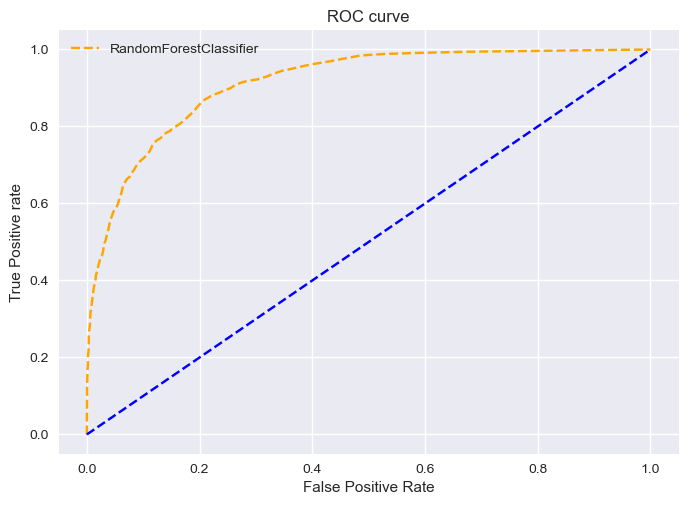

In [82]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## 9.Saving the model

In [83]:
import joblib
joblib.dump(fianlRFC,"final model.pkl")

['final model.pkl']